## Finding Your Way In The City (Graph Edition)
In this notebook your attention will shift from grids to graphs. At least for search ... 

Using Voronoi graphs and the medial axis transform we can find paths which maximize safety from obstacles. In addition, graph representation allows further optimizations and more succinct queries.

In [1]:
# OK this might look a little ugly but...
# need to import the latest version of networkx
# This occassionally fails, so if the next cell 
# doesn't show that you're using networkx 2.1
# please "restart and clear output" from "Kernel" menu
# above and try again.
import sys
!{sys.executable} -m pip install -Iv networkx==2.1
import pkg_resources
pkg_resources.require("networkx==2.1")
import networkx as nx

Created temporary directory: /tmp/pip-ephem-wheel-cache-5fn19h8n
Created temporary directory: /tmp/pip-req-tracker-n1cc_k9y
Created requirements tracker '/tmp/pip-req-tracker-n1cc_k9y'
Created temporary directory: /tmp/pip-install-a79jd6zu
  1 location(s) to search for versions of networkx:
  * https://pypi.org/simple/networkx/
  Getting page https://pypi.org/simple/networkx/
  Looking up "https://pypi.org/simple/networkx/" in the cache
  Request header has "max_age" as 0, cache bypassed
  Starting new HTTPS connection (1): pypi.org:443
  https://pypi.org:443 "GET /simple/networkx/ HTTP/1.1" 200 14502
  Updating cache with response from "https://pypi.org/simple/networkx/"
  Caching due to etag
  Analyzing links from page https://pypi.org/simple/networkx/
    Skipping link https://files.pythonhosted.org/packages/e9/19/4f6af1a5e781eeba775405bc9bee1c9a736707544286b5bf09871914b6af/networkx-0.34-py2.4.egg#sha256=8124402f14a1e31995dbde226ea08b820a8f86910fe519826be5aa46d46d8289 (from https://

  https://files.pythonhosted.org:443 "GET /packages/11/42/f951cc6838a4dff6ce57211c4d7f8444809ccbe2134179950301e5c4c83c/networkx-2.1.zip HTTP/1.1" 200 1612593
    99% |████████████████████████████████| 1.6MB 110kB/s eta 0:00:01  Ignoring unknown cache-control directive: immutable
  Updating cache with response from "https://files.pythonhosted.org/packages/11/42/f951cc6838a4dff6ce57211c4d7f8444809ccbe2134179950301e5c4c83c/networkx-2.1.zip"
  Caching due to etag
    100% |████████████████████████████████| 1.6MB 109kB/s 
  Added networkx==2.1 from https://files.pythonhosted.org/packages/11/42/f951cc6838a4dff6ce57211c4d7f8444809ccbe2134179950301e5c4c83c/networkx-2.1.zip#sha256=64272ca418972b70a196cb15d9c85a5a6041f09a2f32e0d30c0255f25d458bb1 to build tracker '/tmp/pip-req-tracker-n1cc_k9y'
    Running setup.py (path:/tmp/pip-install-a79jd6zu/networkx/setup.py) egg_info for package networkx
    Running command python setup.py egg_info
    running egg_info
    creating pip-egg-info/networkx.eg

  https://files.pythonhosted.org:443 "GET /packages/5f/88/0075e461560a1e750a0dcbf77f1d9de775028c37a19a346a6c565a257399/decorator-4.4.0-py2.py3-none-any.whl HTTP/1.1" 200 8296
  Ignoring unknown cache-control directive: immutable
  Updating cache with response from "https://files.pythonhosted.org/packages/5f/88/0075e461560a1e750a0dcbf77f1d9de775028c37a19a346a6c565a257399/decorator-4.4.0-py2.py3-none-any.whl"
  Caching due to etag
  Added decorator>=4.1.0 from https://files.pythonhosted.org/packages/5f/88/0075e461560a1e750a0dcbf77f1d9de775028c37a19a346a6c565a257399/decorator-4.4.0-py2.py3-none-any.whl#sha256=f069f3a01830ca754ba5258fde2278454a0b5b79e0d7f5c13b3b97e57d4acff6 (from networkx==2.1) to build tracker '/tmp/pip-req-tracker-n1cc_k9y'
  Removed decorator>=4.1.0 from https://files.pythonhosted.org/packages/5f/88/0075e461560a1e750a0dcbf77f1d9de775028c37a19a346a6c565a257399/decorator-4.4.0-py2.py3-none-any.whl#sha256=f069f3a01830ca754ba5258fde2278454a0b5b79e0d7f5c13b3b97e57d4acff6 (fr

  copying networkx/algorithms/link_analysis/hits_alg.py -> build/lib/networkx/algorithms/link_analysis
  copying networkx/algorithms/link_analysis/pagerank_alg.py -> build/lib/networkx/algorithms/link_analysis
  copying networkx/algorithms/link_analysis/__init__.py -> build/lib/networkx/algorithms/link_analysis
  creating build/lib/networkx/algorithms/operators
  copying networkx/algorithms/operators/all.py -> build/lib/networkx/algorithms/operators
  copying networkx/algorithms/operators/binary.py -> build/lib/networkx/algorithms/operators
  copying networkx/algorithms/operators/unary.py -> build/lib/networkx/algorithms/operators
  copying networkx/algorithms/operators/product.py -> build/lib/networkx/algorithms/operators
  copying networkx/algorithms/operators/__init__.py -> build/lib/networkx/algorithms/operators
  creating build/lib/networkx/algorithms/approximation
  copying networkx/algorithms/approximation/vertex_cover.py -> build/lib/networkx/algorithms/approximation
  copying 

  installing to build/bdist.linux-x86_64/wheel
  running install
  running install_lib
  creating build/bdist.linux-x86_64
  creating build/bdist.linux-x86_64/wheel
  creating build/bdist.linux-x86_64/wheel/networkx
  copying build/lib/networkx/release.py -> build/bdist.linux-x86_64/wheel/networkx
  copying build/lib/networkx/convert_matrix.py -> build/bdist.linux-x86_64/wheel/networkx
  copying build/lib/networkx/convert.py -> build/bdist.linux-x86_64/wheel/networkx
  creating build/bdist.linux-x86_64/wheel/networkx/generators
  copying build/lib/networkx/generators/duplication.py -> build/bdist.linux-x86_64/wheel/networkx/generators
  copying build/lib/networkx/generators/geometric.py -> build/bdist.linux-x86_64/wheel/networkx/generators
  copying build/lib/networkx/generators/degree_seq.py -> build/bdist.linux-x86_64/wheel/networkx/generators
  copying build/lib/networkx/generators/ego.py -> build/bdist.linux-x86_64/wheel/networkx/generators
  copying build/lib/networkx/generators/r

  copying build/lib/networkx/classes/tests/test_filters.py -> build/bdist.linux-x86_64/wheel/networkx/classes/tests
  copying build/lib/networkx/classes/tests/test_multidigraph.py -> build/bdist.linux-x86_64/wheel/networkx/classes/tests
  copying build/lib/networkx/classes/tests/test_digraph_historical.py -> build/bdist.linux-x86_64/wheel/networkx/classes/tests
  copying build/lib/networkx/classes/tests/test_special.py -> build/bdist.linux-x86_64/wheel/networkx/classes/tests
  copying build/lib/networkx/classes/tests/test_graph_historical.py -> build/bdist.linux-x86_64/wheel/networkx/classes/tests
  copying build/lib/networkx/classes/graphviews.py -> build/bdist.linux-x86_64/wheel/networkx/classes
  copying build/lib/networkx/classes/reportviews.py -> build/bdist.linux-x86_64/wheel/networkx/classes
  copying build/lib/networkx/classes/function.py -> build/bdist.linux-x86_64/wheel/networkx/classes
  copying build/lib/networkx/classes/multigraph.py -> build/bdist.linux-x86_64/wheel/netwo

  no previously-included directories found matching 'doc/build'
  no previously-included directories found matching 'doc/auto_examples'
  no previously-included directories found matching 'doc/modules'
  no previously-included directories found matching 'doc/reference/generated'
  no previously-included directories found matching 'doc/reference/algorithms/generated'
  no previously-included directories found matching 'doc/reference/classes/generated'
  no previously-included directories found matching 'doc/reference/readwrite/generated'
  writing manifest file 'networkx.egg-info/SOURCES.txt'
  Copying networkx.egg-info to build/bdist.linux-x86_64/wheel/networkx-2.1-py3.6.egg-info
  running install_scripts
  adding license file "LICENSE.txt" (matched pattern "LICEN[CS]E*")
  creating build/bdist.linux-x86_64/wheel/networkx-2.1.dist-info/WHEEL
  creating '/tmp/pip-wheel-iu4ryqpe/networkx-2.1-py2.py3-none-any.whl' and adding 'build/bdist.linux-x86_64/wheel' to it
  adding 'networkx/__init

  adding 'networkx/algorithms/components/strongly_connected.py'
  adding 'networkx/algorithms/components/weakly_connected.py'
  adding 'networkx/algorithms/components/tests/test_attracting.py'
  adding 'networkx/algorithms/components/tests/test_biconnected.py'
  adding 'networkx/algorithms/components/tests/test_connected.py'
  adding 'networkx/algorithms/components/tests/test_semiconnected.py'
  adding 'networkx/algorithms/components/tests/test_strongly_connected.py'
  adding 'networkx/algorithms/components/tests/test_subgraph_copies.py'
  adding 'networkx/algorithms/components/tests/test_weakly_connected.py'
  adding 'networkx/algorithms/connectivity/__init__.py'
  adding 'networkx/algorithms/connectivity/connectivity.py'
  adding 'networkx/algorithms/connectivity/cuts.py'
  adding 'networkx/algorithms/connectivity/disjoint_paths.py'
  adding 'networkx/algorithms/connectivity/edge_augmentation.py'
  adding 'networkx/algorithms/connectivity/edge_kcomponents.py'
  adding 'networkx/algor

  adding 'networkx/readwrite/graphml.py'
  adding 'networkx/readwrite/leda.py'
  adding 'networkx/readwrite/multiline_adjlist.py'
  adding 'networkx/readwrite/nx_shp.py'
  adding 'networkx/readwrite/nx_yaml.py'
  adding 'networkx/readwrite/p2g.py'
  adding 'networkx/readwrite/pajek.py'
  adding 'networkx/readwrite/sparse6.py'
  adding 'networkx/readwrite/json_graph/__init__.py'
  adding 'networkx/readwrite/json_graph/adjacency.py'
  adding 'networkx/readwrite/json_graph/cytoscape.py'
  adding 'networkx/readwrite/json_graph/jit.py'
  adding 'networkx/readwrite/json_graph/node_link.py'
  adding 'networkx/readwrite/json_graph/tree.py'
  adding 'networkx/readwrite/json_graph/tests/test_adjacency.py'
  adding 'networkx/readwrite/json_graph/tests/test_cytoscape.py'
  adding 'networkx/readwrite/json_graph/tests/test_jit.py'
  adding 'networkx/readwrite/json_graph/tests/test_node_link.py'
  adding 'networkx/readwrite/json_graph/tests/test_tree.py'
  adding 'networkx/readwrite/tests/test_adjlis

done
  Stored in directory: /home/irving/.cache/pip/wheels/44/c0/34/6f98693a554301bdb405f8d65d95bbcd3e50180cbfdd98a94e
  Removing source in /tmp/pip-install-a79jd6zu/networkx
Successfully built networkx


Cleaning up...
Removed build tracker '/tmp/pip-req-tracker-n1cc_k9y'
1 location(s) to search for versions of pip:
* https://pypi.org/simple/pip/
Getting page https://pypi.org/simple/pip/
Looking up "https://pypi.org/simple/pip/" in the cache
Request header has "max_age" as 0, cache bypassed
Starting new HTTPS connection (1): pypi.org:443
https://pypi.org:443 "GET /simple/pip/ HTTP/1.1" 304 0
Analyzing links from page https://pypi.org/simple/pip/
  Found link https://files.pythonhosted.org/packages/3d/9d/1e313763bdfb6a48977b65829c6ce2a43eaae29ea2f907c8bbef024a7219/pip-0.2.tar.gz#sha256=88bb8d029e1bf4acd0e04d300104b7440086f94cc1ce1c5c3c31e3293aee1f81 (from https://pypi.org/simple/pip/), version: 0.2
  Found link https://files.pythonhosted.org/packages/18/ad/c0fe6cdfe1643a19ef027c7168572

  Found link https://files.pythonhosted.org/packages/ce/63/8d99ae60d11ae1a65f5d4fc39a529a598bd3b8e067132210cb0c4d9e9f74/pip-6.0.3.tar.gz#sha256=b091a35f5fa0faffac0b27b97e1e1e93ffe63b463c2ea8dbde0c1fb987933614 (from https://pypi.org/simple/pip/), version: 6.0.3
  Found link https://files.pythonhosted.org/packages/c5/0e/c974206726542bc495fc7443dd97834a6d14c2f0cba183fcfcd01075225a/pip-6.0.4-py2.py3-none-any.whl#sha256=8dfd95de29a7a3bb1e7d368cc83d566938eb210b04d553ebfe5e3a422f4aec65 (from https://pypi.org/simple/pip/), version: 6.0.4
  Found link https://files.pythonhosted.org/packages/02/a1/c90f19910ee153d7a0efca7216758121118d7e93084276541383fe9ca82e/pip-6.0.4.tar.gz#sha256=1dbbff9c369e510c7468ab68ba52c003f68f83c99c2f8259acd51099e8799f1e (from https://pypi.org/simple/pip/), version: 6.0.4
  Found link https://files.pythonhosted.org/packages/e9/1b/c6a375a337fb576784cdea3700f6c3eaf1420f0a01458e6e034cc178a84a/pip-6.0.5-py2.py3-none-any.whl#sha256=b2c20e3a2a43b2bbb1d19ad98be27eccc7b0f0ece016d

In [2]:
nx.__version__ # should be 2.1

'2.1'

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from grid16 import create_grid_and_edges
import numpy.linalg as LA
%matplotlib inline 

In [4]:
plt.rcParams['figure.figsize'] = 12, 12

In [5]:
# This is the same obstacle data from the previous lesson.
filename = 'colliders.csv'
data = np.loadtxt(filename, delimiter=',', dtype='Float64', skiprows=2)
print(data)

[[-310.2389   -439.2315     85.5         5.          5.         85.5     ]
 [-300.2389   -439.2315     85.5         5.          5.         85.5     ]
 [-290.2389   -439.2315     85.5         5.          5.         85.5     ]
 ...
 [ 257.8061    425.1645      1.75852     1.292725    1.292725    1.944791]
 [ 293.9967    368.3391      3.557666    1.129456    1.129456    3.667319]
 [ 281.5162    354.4156      4.999351    1.053772    1.053772    4.950246]]


Starting and goal positions in *(north, east)*.

In [6]:
start_ne = (25,  100)
goal_ne = (750., 370.)

In [7]:
# Static drone altitude (metres)
drone_altitude = 5
safety_distance = 3

In [8]:
# This is now the routine using Voronoi
grid, edges = create_grid_and_edges(data, drone_altitude, safety_distance)
print(len(edges))

-316.0 605.0
-445.0 476.0
921 921
1495


Plot the edges on top of the grid along with start and goal locations.

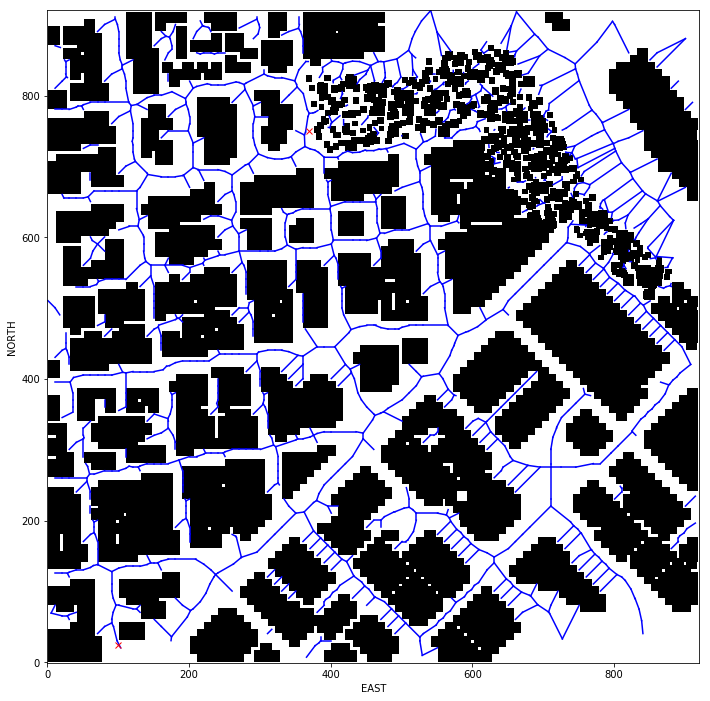

In [9]:
# equivalent to
# plt.imshow(np.flip(grid, 0))
plt.imshow(grid, origin='lower', cmap='Greys') 

for e in edges:
    p1 = e[0]
    p2 = e[1]
    plt.plot([p1[1], p2[1]], [p1[0], p2[0]], 'b-')

    
plt.plot(start_ne[1], start_ne[0], 'rx')
plt.plot(goal_ne[1], goal_ne[0], 'rx')

plt.xlabel('EAST')
plt.ylabel('NORTH')
plt.show()

We now have a graph, well at least visually. The next step is to use the [`networkx`](https://networkx.github.io) to create the graph. **NetworkX** is a popular library handling anything and everything related to graph data structures and algorithms.

**NOTE:** In the initial import above it was imported with the `nx` alias.

You're encouraged to read the documentation but here's a super quick tour:

1. Create a graph:

```
G = nx.Graph()
```

2. Add an edge:

```
p1 = (10, 2.2)
p2 = (50, 40)
G = nx.add_edge(p1, p2)
```

3 Add an edge with a weight:

```
p1 = (10, 2.2)
p2 = (50, 40)
dist = LA.norm(np.array(p2) - np.array(p1))
G = nx.add_edge(p1, p2, weight=dist)
```

In [10]:
# TODO: create the graph with the weight of the edges
# set to the Euclidean distance between the points
G = nx.Graph()

for e in edges:
    p1 = e[0]
    p2 = e[1]
    dist = LA.norm(np.array(p2) - np.array(p1))
    G.add_edge(p1, p2, weight=dist)

You need a method to search the graph, and you'll adapt A* in order to do this. The notable differences being the actions are now the outgoing edges and the cost of an action is that weight of that edge.

In [11]:
from queue import PriorityQueue

def heuristic(n1, n2):
    #TODO: define a heuristic
    #print(n1, n2)
    p1 = np.array(n1)
    p2 = np.array(n2)
    h = np.sqrt(np.sum((p1-p2)**2))
    return 0

###### THIS IS YOUR OLD GRID-BASED A* IMPLEMENTATION #######
###### With a few minor modifications it can work with graphs! ####
#TODO: modify A* to work with a graph
def a_star(graph, heuristic, start, goal):
    
    path = []
    queue = PriorityQueue()
    queue.put((0, start))
    visited = set(start)

    branch = {}
    found = False
    
    while not queue.empty():
        item = queue.get()
        current_cost = item[0]
        current_node = item[1]

        if current_node == goal:        
            print('Found a path.')
            found = True
            break
            
        else:
            for next_node in graph[current_node]:
                # get the tuple representation
                cost = graph.edges[current_node, next_node]['weight']
                new_cost = current_cost + cost + heuristic(next_node, goal)
                
                if next_node not in visited:                
                    visited.add(next_node)               
                    queue.put((new_cost, next_node))
                    
                    branch[next_node] = (new_cost, current_node)
             
    path = []
    path_cost = 0
    if found:
        
        # retrace steps
        path = []
        n = goal
        path_cost = branch[n][0]
        while branch[n][1] != start:
            path.append(branch[n][1])
            n = branch[n][1]
        path.append(branch[n][1])
            
    return path[::-1], path_cost

### Solution

This solution consists of two parts:

1. Find the closest point in the graph to our current location, same thing for the goal location.
2. Compute the path from the two points in the graph using the A* algorithm.
3. Feel free to use any of the path pruning techniques to make the path even smaller! 
4. Plot it up to see the results!

### TODO: Write your solution!

In [12]:
def closest_point(graph, current_point):
    """
    Compute the closest point in the `graph`
    to the `current_point`.
    """
    closest_point = None
    dist = 100000
    for p in graph.nodes:
        d = LA.norm(np.array(p) - np.array(current_point))
        if d < dist:
            closest_point = p
            dist = d
    return closest_point

In [13]:
start_ne_g = closest_point(G, start_ne)
goal_ne_g = closest_point(G, goal_ne)

print(start_ne_g)
print(goal_ne_g)

path, cost = a_star(G, heuristic, start_ne_g, goal_ne_g)
print(len(path))

(20.7611, 103.26850000000002)
(748.7187188843021, 364.4144680930903)
Found a path.
119


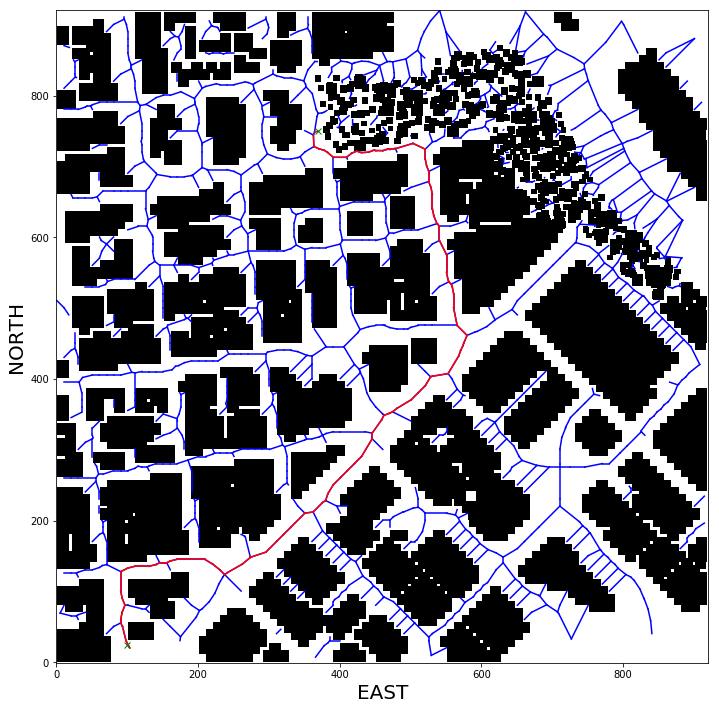

In [14]:
# equivalent to
# plt.imshow(np.flip(grid, 0))
plt.imshow(grid, origin='lower', cmap='Greys') 

for e in edges:
    p1 = e[0]
    p2 = e[1]
    plt.plot([p1[1], p2[1]], [p1[0], p2[0]], 'b-')
    
plt.plot([start_ne[1], start_ne_g[1]], [start_ne[0], start_ne_g[0]], 'r-')
for i in range(len(path)-1):
    p1 = path[i]
    p2 = path[i+1]
    plt.plot([p1[1], p2[1]], [p1[0], p2[0]], 'r-')
plt.plot([goal_ne[1], goal_ne_g[1]], [goal_ne[0], goal_ne_g[0]], 'r-')
    
plt.plot(start_ne[1], start_ne[0], 'gx')
plt.plot(goal_ne[1], goal_ne[0], 'gx')

plt.xlabel('EAST', fontsize=20)
plt.ylabel('NORTH', fontsize=20)
plt.show()

[our solution](/notebooks/Graph-Search-Solution.ipynb)